In [1]:
from DT_improved import decision_tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# loading the iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X = X[:,[1,3]]

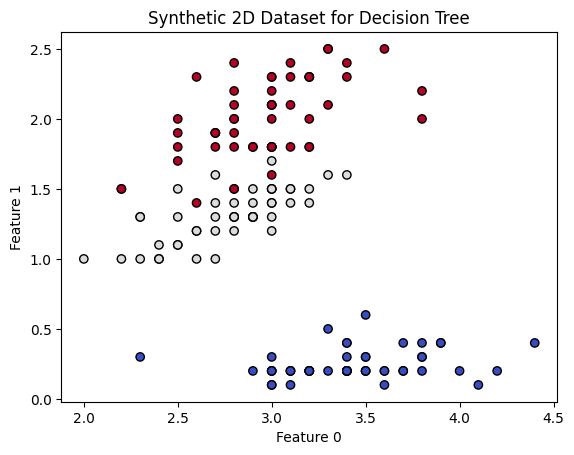

In [3]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Synthetic 2D Dataset for Decision Tree")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Training the data without implementing the min_information_gain condition

In [4]:
# Train decision tree
model1 = decision_tree(min_information_gain=0.0)
model1.fit(X, y)

# Show tree structure and number of leaf nodes
print(model1)
print(f"Number of leaf nodes: {model1._n_leaf}")

The decision tree is given as below :
..............................................

Node: Feature 1 <= 0.600
	Leaf: label = 0, size = 50, pure leaf = True
	Node: Feature 1 <= 1.700
		Node: Feature 1 <= 1.300
			Leaf: label = 1, size = 28, pure leaf = True
			Node: Feature 0 <= 2.600
				Leaf: label = 2, size = 5, pure leaf = False
				Leaf: label = 1, size = 21, pure leaf = False
		Node: Feature 1 <= 1.800
			Node: Feature 0 <= 3.100
				Leaf: label = 2, size = 10, pure leaf = True
				Leaf: label = 1, size = 2, pure leaf = False
			Leaf: label = 2, size = 34, pure leaf = True

Number of leaf nodes: 7


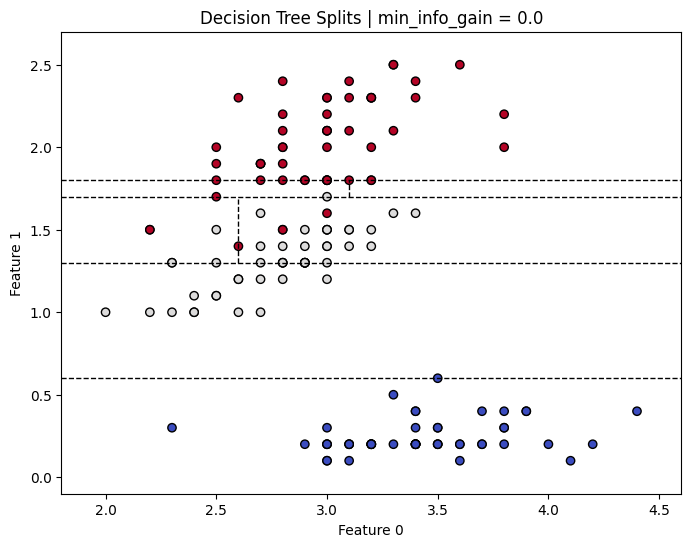

In [5]:
# Plot decision boundaries
def plot_splits(tree, x_min, x_max, y_min, y_max):
    if tree['leaf']:
        return
    feat = tree['feature']
    thresh = tree['threshold']
    if feat == 0:
        plt.plot([thresh, thresh], [y_min, y_max], 'k--', lw=1)
        plot_splits(tree['left'], x_min, thresh, y_min, y_max)
        plot_splits(tree['right'], thresh, x_max, y_min, y_max)
    else:
        plt.plot([x_min, x_max], [thresh, thresh], 'k--', lw=1)
        plot_splits(tree['left'], x_min, x_max, y_min, thresh)
        plot_splits(tree['right'], x_min, x_max, thresh, y_max)

x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plot_splits(model1._tree, x_min, x_max, y_min, y_max)
plt.title(f"Decision Tree Splits | min_info_gain = 0.0")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Clearly the decision tree has overfitted the data. It has introduced decision boundaries even at the places of mere data noise.

In [6]:
# Test predictions
test_points = np.array([[0.5, 2], [0.5, -1.5], [2, 0], [4, 0]])
y_pred = model1.predict(test_points)
print("Predictions for test points:", y_pred)

Predictions for test points: [2 0 0 0]


Training the data with the min_information_gain condition

In [7]:
# Train decision tree
model2 = decision_tree(min_information_gain=0.1)
model2.fit(X, y)

# Show tree structure and number of leaf nodes
print(model2)
print(f"Number of leaf nodes: {model2._n_leaf}")

The decision tree is given as below :
..............................................

Node: Feature 1 <= 0.600
	Leaf: label = 0, size = 50, pure leaf = True
	Node: Feature 1 <= 1.700
		Leaf: label = 1, size = 54, pure leaf = False
		Leaf: label = 2, size = 46, pure leaf = False

Number of leaf nodes: 3


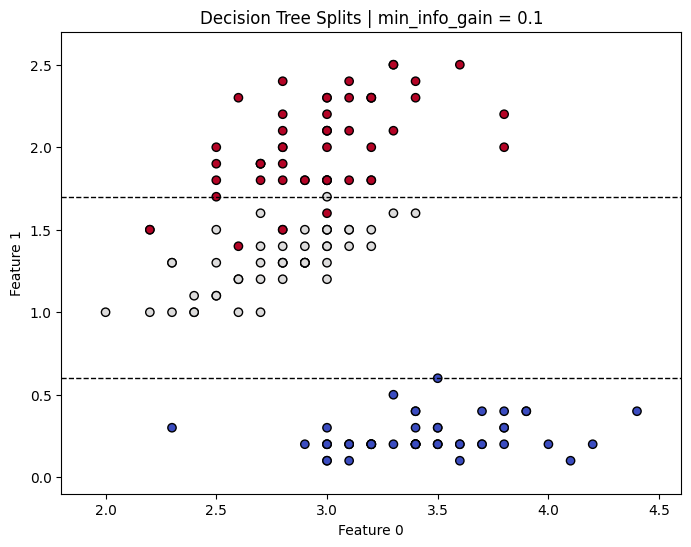

In [8]:
# Plot decision boundaries
def plot_splits(tree, x_min, x_max, y_min, y_max):
    if tree['leaf']:
        return
    feat = tree['feature']
    thresh = tree['threshold']
    if feat == 0:
        plt.plot([thresh, thresh], [y_min, y_max], 'k--', lw=1)
        plot_splits(tree['left'], x_min, thresh, y_min, y_max)
        plot_splits(tree['right'], thresh, x_max, y_min, y_max)
    else:
        plt.plot([x_min, x_max], [thresh, thresh], 'k--', lw=1)
        plot_splits(tree['left'], x_min, x_max, y_min, thresh)
        plot_splits(tree['right'], x_min, x_max, thresh, y_max)

x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plot_splits(model2._tree, x_min, x_max, y_min, y_max)
plt.title(f"Decision Tree Splits | min_info_gain = 0.1")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

The problem of overfitting has been taken care of to some extent

In [9]:
# Test predictions
test_points = np.array([[0.5, 2], [0.5, -1.5], [2, 0], [4, 0]])
y_pred = model2.predict(test_points)
print("Predictions for test points:", y_pred)

Predictions for test points: [2 0 0 0]
